In [2]:
!pip install xlrd

    100% |████████████████████████████████| 112kB 4.1MB/s 


In [0]:
#Reading the dataset
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
import csv
import numpy as np
import matplotlib.pyplot as plt 
%pylab inline 
data =pd.read_csv("KDDCup99.csv")
data.head()

In [8]:
#Number of Rows
print(len(data))

28082


In [9]:
#Different types of attacks in the database
data['label'].value_counts()

normal             24097
smurf               3695
teardrop              99
ipsweep               94
guess_passwd          53
pod                   20
portsweep             17
buffer_overflow        2
neptune                2
loadmodule             1
perl                   1
Name: label, dtype: int64

In [0]:
#creating a CSV file with attribute names 
with open('KDDCup99-dos.csv', 'w',newline='') as out:
    writer=csv.writer(out)
    writer.writerow([c for c in data.keys()])


In [0]:
a=['back','land','neptune','pod','smurf','teardrop','normal']

with open('KDDCup99.csv', 'r') as inp, open('KDDCup99-dos.csv', 'a',newline='') as out:
    writer = csv.writer(out)
    for row in csv.reader(inp):
      #print(row[41])
      if row[41] in a:
        writer.writerow(row)

In [37]:
#Creating new dataframe with modified dataset
%pylab inline 
datapre=pd.read_csv("KDDCup99-dos.csv")
datapre.head()

Populating the interactive namespace from numpy and matplotlib


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [0]:
def class_counts(rows):
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

7


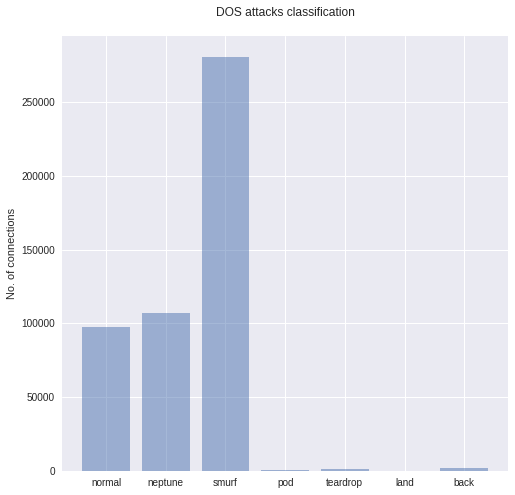

In [60]:
#Drawing a bar graph to classify DOS attacks in connections
objects = classes.keys()
y_pos = np.arange(len(objects))
print(len(objects))
performance = [classes[val] for val in classes.keys()]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('No. of connections')
plt.title('DOS attacks classification\n')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [61]:
#Mapping of Categorical data in the dataset
cleanup_nums = {"protocol_type":     {"tcp": 1, "icmp": 2, "udp": 3},
                "service": {"vmnet": 1, "smtp": 2, "ntp_u":3, "shell":4, "kshell":5, "aol":6, "imap4":7, "urh_i":8, "netbios_ssn":9,
                           "tftp_u":10, "mtp":11, "uucp":12, "nnsp":13, "echo":14, "tim_i":15, "ssh":16, "iso_tsap":17, "time":18,
                           "netbios_ns":19,"systat":20, "hostnames":21, "login":22, "efs":23, "supdup":24, "http_8001":25, "courier":26,
                           "ctf":27,"finger":28,"nntp":29,"ftp_data":30,"red_i":31,"ldap":32,"http":33,"ftp":34,"pm_dump":35,"exec":36,
                           "klogin":37,"auth":38,"netbios_dgm":39,"other":40,"link":41,"X11":42,"discard":43,"private":44,"remote_job":45,
                           "IRC":46,"daytime":47,"pop_3":48,"pop_2":49,"gopher":50,"sunrpc":51,"name":52,"rje":53,"domain":54,"uucp_path":55,
                           "http_2784":56,"Z39_50":57,"domain_u":58,"csnet_ns":59,"whois":60,"eco_i":61,"bgp":62,"sql_net":63,"printer":64,
                           "telnet":65,"ecr_i":66,"urp_i":67,"netstat":68,"http_443":69,"harvest":70},
               "flag":{"RSTR":1,"S3":2,"SF":3,"RSTO":4,"SH":5,"OTH":6,"S2":7,"RSTOS0":8,"S1":9,"S0":10,"REJ":11}}
#Replacing the encoded data in the dataset
datapre.replace(cleanup_nums, inplace=True)
datapre.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,33,3,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,1,33,3,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,1,33,3,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,1,33,3,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,1,33,3,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [62]:
#Replacing all the types of DOS attacks as 1 and others as 0
datapre['label'][datapre['label']!='normal'] = 'attack'
datapre['label'][datapre['label']=='normal'] = 0
datapre['label'][datapre['label']=='attack'] = 1
datapre[['label']] = datapre[['label']].apply(pd.to_numeric)
datapre['label'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    391458
0     97277
Name: label, dtype: int64

In [64]:
#Sampling 25% of the data without replacement
from sklearn.cross_validation import train_test_split
# Generate the sampleset from training set.  Set random_state to be able to replicate results.
sampleset1 = datapre.sample(frac=0.5, random_state=1)
sampleset = sampleset1.sample(frac=0.5, random_state=1)
# Print the shape of sample set.
print(sampleset['label'].value_counts())

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


1    97754
0    24430
Name: label, dtype: int64


In [0]:
#We will work with this dataset with the x feature-object matrix and values of the y target variable.
array=sampleset.values
x=array[:,0:41]
y=array[:,41]

In [0]:
#Cross validation
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=42)

In [67]:
#Naive Bayes Classifier
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Naive_Bayes Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)

------------------------------------------
Naive_Bayes Accuracy =  93.88367525098211  %
[[ 5183  2049]
 [  193 29231]]
             precision    recall  f1-score   support

        0.0       0.96      0.72      0.82      7232
        1.0       0.93      0.99      0.96     29424

avg / total       0.94      0.94      0.94     36656



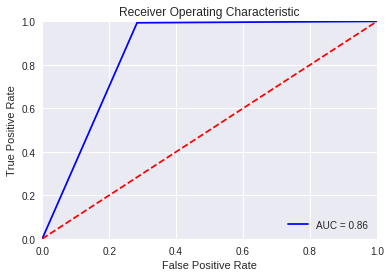

In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [69]:
#Applying Logistic regression to find important features. Higher the rank more important the attribute
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(x, y)
print("Num Features: ",fit.n_features_)
print("Selected Features: ",fit.support_)
print("Ranking of features: ",fit.ranking_)

Num Features:  10
Selected Features:  [False  True False False False False False  True False False False  True
 False False False False False False False False False False False False
 False False  True False  True False False False False  True False  True
 False False  True  True  True]
Ranking of features:  [ 6  1 13 16 29 28 14  1 30  2 26  1  5 24 27  8 20 23 18 31 32  7 10 11
  9  4  1 19  1 15 12 25 22  1 21  1 17  3  1  1  1]


In [71]:
#Applying Decision tree to find important features. Higher the score more the important the attribute
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[3.23165129e-05 4.13238398e-02 4.71454878e-02 3.82101949e-02
 7.62354014e-03 7.74873491e-03 8.75385035e-05 7.72510249e-03
 0.00000000e+00 7.90337935e-03 0.00000000e+00 1.18294427e-01
 5.81623514e-03 4.24055311e-08 0.00000000e+00 2.32705491e-04
 0.00000000e+00 0.00000000e+00 8.20275511e-06 0.00000000e+00
 0.00000000e+00 7.22958588e-06 1.66418009e-02 1.18212123e-01
 2.95569250e-02 2.57647003e-02 6.46724374e-03 5.96540286e-03
 7.00295080e-02 2.25231561e-04 2.81066408e-02 1.68851045e-01
 6.16590990e-02 1.01842651e-01 1.33431786e-02 3.81853546e-02
 2.98336717e-04 1.14529598e-03 1.41149793e-02 1.54003839e-02
 2.03112325e-03]


In [72]:
#Dropping all the other unselecteced attributes from dataset
datapre.drop('duration', axis = 1, inplace = True)
print("Dropping duration")
datapre.drop('flag', axis = 1, inplace = True)
print("Dropping flag")
datapre.drop('dst_bytes', axis = 1, inplace = True)
print("Dropping dst_bytes")
datapre.drop('land', axis = 1, inplace = True)
print("Dropping land")
datapre.drop('wrong_fragment', axis = 1, inplace = True)
print("Dropping wrong_fragment")
datapre.drop('urgent', axis = 1, inplace = True)
print("Dropping urgent")
datapre.drop('hot', axis = 1, inplace = True)
print("Dropping hot")
datapre.drop('num_failed_logins', axis = 1, inplace = True)
print("Dropping num_failed_logins")
datapre.drop('logged_in', axis = 1, inplace = True)
print("Dropping logged_in")
datapre.drop('lnum_compromised', axis = 1, inplace = True)
print("Dropping lnum_compromised")
datapre.drop('lroot_shell', axis = 1, inplace = True)
print("Dropping lroot_shell")
datapre.drop('lsu_attempted', axis = 1, inplace = True)
print("Dropping lsu_attempted")
datapre.drop('lnum_root', axis = 1, inplace = True)
print("Dropping lnum_root")
datapre.drop('lnum_file_creations', axis = 1, inplace = True)
print("Dropping lnum_file_creations")
datapre.drop('lnum_shells', axis = 1, inplace = True)
print("Dropping lnum_shells")
datapre.drop('lnum_access_files', axis = 1, inplace = True)
print("Dropping lnum_access_files")
datapre.drop('lnum_outbound_cmds', axis = 1, inplace = True)
print("Dropping lnum_outbound_cmds")
datapre.drop('is_host_login', axis = 1, inplace = True)
print("Dropping is_host_login")
datapre.drop('is_guest_login', axis = 1, inplace = True)
print("Dropping is_guest_login")
datapre.drop('srv_count', axis = 1, inplace = True)
print("Dropping srv_count")
datapre.drop('serror_rate', axis = 1, inplace = True)
print("Dropping serror_rate")
datapre.drop('srv_serror_rate', axis = 1, inplace = True)
print("Dropping srv_serror_rate")
datapre.drop('rerror_rate', axis = 1, inplace = True)
print("Dropping rerror_rate")
datapre.drop('srv_rerror_rate', axis = 1, inplace = True)
print("Dropping srv_rerror_rate")
datapre.drop('diff_srv_rate', axis = 1, inplace = True)
print("Dropping diff_srv_rate")
datapre.drop('srv_diff_host_rate', axis = 1, inplace = True)
print("Dropping srv_diff_host_rate")
datapre.drop('dst_host_count', axis = 1, inplace = True)
print("dst_host_count")
datapre.drop('dst_host_srv_count', axis = 1, inplace = True)
print("Dropping dst_host_srv_count")
datapre.drop('dst_host_diff_srv_rate', axis = 1, inplace = True)
print("Dropping dst_host_diff_srv_rate")
datapre.drop('dst_host_srv_diff_host_rate', axis = 1, inplace = True)
print("Dropping dst_host_srv_diff_host_rate")
datapre.drop('dst_host_serror_rate', axis = 1, inplace = True)
print("Dropping dst_host_serror_rate")
datapre.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)
print("Dropping dst_host_srv_serror_rate")
datapre.drop('dst_host_rerror_rate', axis = 1, inplace = True)
print("Dropping dst_host_rerror_rate")
datapre.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)
print("Dropping dst_host_srv_rerror_rate")

Dropping duration
Dropping flag
Dropping dst_bytes
Dropping land
Dropping wrong_fragment
Dropping urgent
Dropping hot
Dropping num_failed_logins
Dropping logged_in
Dropping lnum_compromised
Dropping lroot_shell
Dropping lsu_attempted
Dropping lnum_root
Dropping lnum_file_creations
Dropping lnum_shells
Dropping lnum_access_files
Dropping lnum_outbound_cmds
Dropping is_host_login
Dropping is_guest_login
Dropping srv_count
Dropping serror_rate
Dropping srv_serror_rate
Dropping rerror_rate
Dropping srv_rerror_rate
Dropping diff_srv_rate
Dropping srv_diff_host_rate
dst_host_count
Dropping dst_host_srv_count
Dropping dst_host_diff_srv_rate
Dropping dst_host_srv_diff_host_rate
Dropping dst_host_serror_rate
Dropping dst_host_srv_serror_rate
Dropping dst_host_rerror_rate
Dropping dst_host_srv_rerror_rate


In [0]:
#Writing the extracted data into new file
datapre.to_csv("KDDCup99DOSONLY.csv",encoding='utf-8', index=False)
datapre.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,33,3,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,33,3,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,33,3,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,33,3,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,33,3,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [0]:
#Sampling 25% of the data with replacement
from sklearn.cross_validation import train_test_split
# Generate the sampleset from training set.  Set random_state to be able to replicate results.
sampleset1 = datapre.sample(frac=0.5, random_state=1)
sampleset = sampleset1.sample(frac=0.5, random_state=1)
# Print the shape of sample set.
sampleset['label'].value_counts()

1    97754
0    24430
Name: label, dtype: int64

In [0]:
#We will work with this dataset with the x feature-object matrix and values of the y target variable.
array=sampleset.values
x=array[:,0:7]
y=array[:,7]

In [0]:
#Cross validation
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=42)

In [0]:
#Array for storing classifier Models and their respective scores
models=[]
scores=[]

------------------------------------------
Accuracy =  98.47228284591881  %
[[ 7028   204]
 [  356 29068]]
             precision    recall  f1-score   support

        0.0       0.95      0.97      0.96      7232
        1.0       0.99      0.99      0.99     29424

avg / total       0.98      0.98      0.98     36656



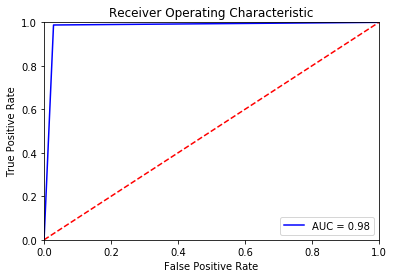

In [0]:
#Naive Bayes Classifier
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

models.append("Naive Bayes Classifier")
scores.append(acc*100)

------------------------------------------
Accuracy =  99.93998254037538  %
[[ 7222    10]
 [   12 29412]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      7232
        1.0       1.00      1.00      1.00     29424

avg / total       1.00      1.00      1.00     36656



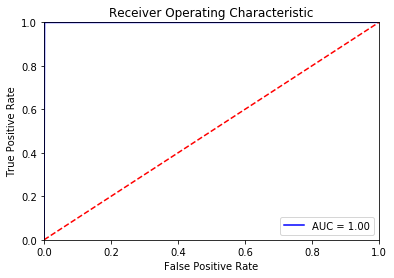

In [0]:
#Decision Tree Classisfier 
from sklearn import tree
clf = tree.DecisionTreeClassifier(splitter = "random", criterion = "entropy", max_depth = 20)
 
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
from sklearn.metrics import accuracy_score
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

models.append("Decision tree Classifier")
scores.append(acc*100)

------------------------------------------
Accuracy =  99.98090353557399  %
[[ 7231     1]
 [    6 29418]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      7232
        1.0       1.00      1.00      1.00     29424

avg / total       1.00      1.00      1.00     36656



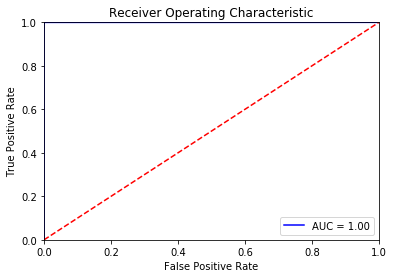

------------------------------------------
Accuracy =  99.97271933653427  %
[[ 7229     3]
 [    7 29417]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      7232
        1.0       1.00      1.00      1.00     29424

avg / total       1.00      1.00      1.00     36656



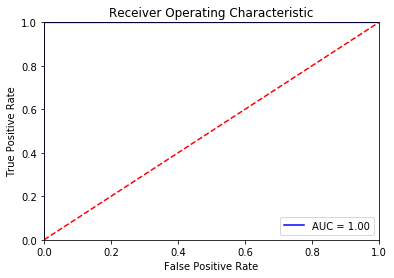

In [0]:
#Random Forest Classifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)

report = classification_report(labels_test, prediction)
print(report)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

models.append("Random Forest Classifier")
scores.append(acc*100)


#K-Nearest Neighbour Classifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data
clf = KNeighborsClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)

report = classification_report(labels_test, prediction)
print(report)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

models.append("K-Nearest neighbour Classifier")
scores.append(acc*100)

In [0]:
#Making a dataframe that consists of models and their respective scores
dat = pd.DataFrame(index=[1,2,3,4])
dat["Model"] = models
dat["Score"] = scores
dat.set_index("Model")

,Score
Model,
Naive Bayes Classifier,98.472283
Decision tree Classifier,99.939983
Random Forest Classifier,99.980904
K-Nearest neighbour Classifier,99.972719


In [0]:
#Finding missing data
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(data.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column